# EDA: total population by geographic region

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
import warnings

def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.indexing past lexsort depth may impact performance')
disable_pandas_warnings()

In [5]:
df = pd.read_csv('..\\DataSets\\BM\\region\\region_population.csv')

In [6]:
df

,country_name,country_code,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,AFRICA EASTERN AND SOUTHERN,AFE,"22,815","-511,160","-556,663","-156,997","-391,945","-243,945","-427,138","-813,478",...,"-683,611","-285,231","-92,842","-199,608","394,925","-864,708","-343,075","-366,105","-187,410","-48,955"
1,AFRICA WESTERN AND CENTRAL,AFW,"-529,414","-101,888","-72,380","-345,858","-198,790","10,350","-188,064","56,467",...,"-198,802","-435,876","-377,305","-280,418","-360,393","-167,286","-200,823","-255,888","-328,552","-99,761"
2,EAST ASIA & PACIFIC,EAS,"78,472","-928,972","-849,505","-787,093","-567,071","-667,831","-246,490","-216,329",...,"465,510","526,680","448,601","325,445","522,034","539,479","414,719","205,151","232,677","180,870"
3,EUROPE & CENTRAL ASIA,ECS,"353,755","413,431","50,409","387,534","-65,762","253,274","113,260","-87,120",...,"1,121,738","1,315,534","1,196,323","1,504,844","1,514,027","1,586,627","1,026,421","1,142,576","1,314,636","1,259,036"
4,LATIN AMERICA & CARIBBEAN,LCN,"-635,393","-789,362","-736,813","-799,413","-727,304","-812,708","-814,722","-802,462",...,"-495,889","-488,483","-535,370","-494,419","-424,043","-139,806","-281,608","-338,149","-424,522","-163,087"
5,MIDDLE EAST & NORTH AFRICA,MEA,"-99,275","759,473","-11,230","-984,086","-180,184","-142,826","44,978","265,402",...,"-344,284","230,635","550,874","401,511","427,751","-167,117","-175,273","398,806","119,982","-1,699,850"
6,NORTH AMERICA,NAC,"1,566,949","1,696,571","1,940,175","1,881,649","1,939,565","1,816,215","1,922,047","2,006,919",...,"1,551,053","1,568,434","1,563,061","1,446,330","1,454,272","1,769,865","1,739,131","1,619,076","1,550,648","871,032"
7,SOUTH ASIA,SAS,"-765,584","-545,640","228,485","796,462","183,479","-225,905","-418,704","-423,233",...,"-1,412,371","-2,427,962","-2,752,864","-2,708,921","-3,523,806","-2,552,785","-2,181,786","-2,409,118","-2,281,362","-302,152"
8,SUB-SAHARAN AFRICA,SSF,"-506,599","-613,048","-629,043","-502,855","-590,735","-233,595","-615,202","-757,011",...,"-882,413","-721,107","-470,147","-480,026","34,532","-1,031,994","-543,898","-621,993","-515,962","-148,716"
9,WORLD,WLD,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let's eliminate the WORLD row because it's a results register

In [7]:
df = df[df['country_name'] != 'WORLD']

In [8]:
df.head()

,country_name,country_code,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,AFRICA EASTERN AND SOUTHERN,AFE,"22,815","-511,160","-556,663","-156,997","-391,945","-243,945","-427,138","-813,478",...,"-683,611","-285,231","-92,842","-199,608","394,925","-864,708","-343,075","-366,105","-187,410","-48,955"
1,AFRICA WESTERN AND CENTRAL,AFW,"-529,414","-101,888","-72,380","-345,858","-198,790","10,350","-188,064","56,467",...,"-198,802","-435,876","-377,305","-280,418","-360,393","-167,286","-200,823","-255,888","-328,552","-99,761"
2,EAST ASIA & PACIFIC,EAS,"78,472","-928,972","-849,505","-787,093","-567,071","-667,831","-246,490","-216,329",...,"465,510","526,680","448,601","325,445","522,034","539,479","414,719","205,151","232,677","180,870"
3,EUROPE & CENTRAL ASIA,ECS,"353,755","413,431","50,409","387,534","-65,762","253,274","113,260","-87,120",...,"1,121,738","1,315,534","1,196,323","1,504,844","1,514,027","1,586,627","1,026,421","1,142,576","1,314,636","1,259,036"
4,LATIN AMERICA & CARIBBEAN,LCN,"-635,393","-789,362","-736,813","-799,413","-727,304","-812,708","-814,722","-802,462",...,"-495,889","-488,483","-535,370","-494,419","-424,043","-139,806","-281,608","-338,149","-424,522","-163,087"


In [9]:
df.describe()

,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,population_1998,population_1999,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
count,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
mean,"-57,142","-68,955","-70,729","-56,740","-66,527","-27,441","-70,004","-85,649","-51,049","-61,968",...,"-97,674","-79,708","-52,185","-53,918","4,367","-114,192","-60,688","-69,516","-57,763","-16,843"
std,"715,401","867,077","847,753","930,073","805,076","762,243","803,208","876,613","808,368","788,061",...,"964,341","1,193,156","1,254,564","1,251,449","1,489,403","1,333,622","1,092,075","1,150,495","1,116,098","822,791"
min,"-765,584","-928,972","-849,505","-984,086","-727,304","-812,708","-814,722","-813,478","-798,462","-870,278",...,"-1,412,371","-2,427,962","-2,752,864","-2,708,921","-3,523,806","-2,552,785","-2,181,786","-2,409,118","-2,281,362","-1,699,850"
25%,"-529,414","-613,048","-629,043","-787,093","-567,071","-243,945","-427,138","-757,011","-453,522","-518,744",...,"-683,611","-488,483","-470,147","-480,026","-360,393","-864,708","-343,075","-366,105","-424,522","-163,087"
50%,"-99,275","-511,160","-72,380","-345,858","-198,790","-225,905","-246,490","-216,329","-432,996","-299,757",...,"-344,284","-285,231","-92,842","-199,608","394,925","-167,117","-200,823","-255,888","-187,410","-99,761"
75%,"78,472","413,431","50,409","387,534","-65,762","10,350","44,978","56,467","-17,330","131,492",...,"465,510","526,680","550,874","401,511","522,034","539,479","414,719","398,806","232,677","180,870"
max,"1,566,949","1,696,571","1,940,175","1,881,649","1,939,565","1,816,215","1,922,047","2,006,919","1,926,166","1,811,373",...,"1,551,053","1,568,434","1,563,061","1,504,844","1,514,027","1,769,865","1,739,131","1,619,076","1,550,648","1,259,036"


In [10]:
df.isna().any().sum()

0

# Distribution of the migration around the world, by region.

### Histograms

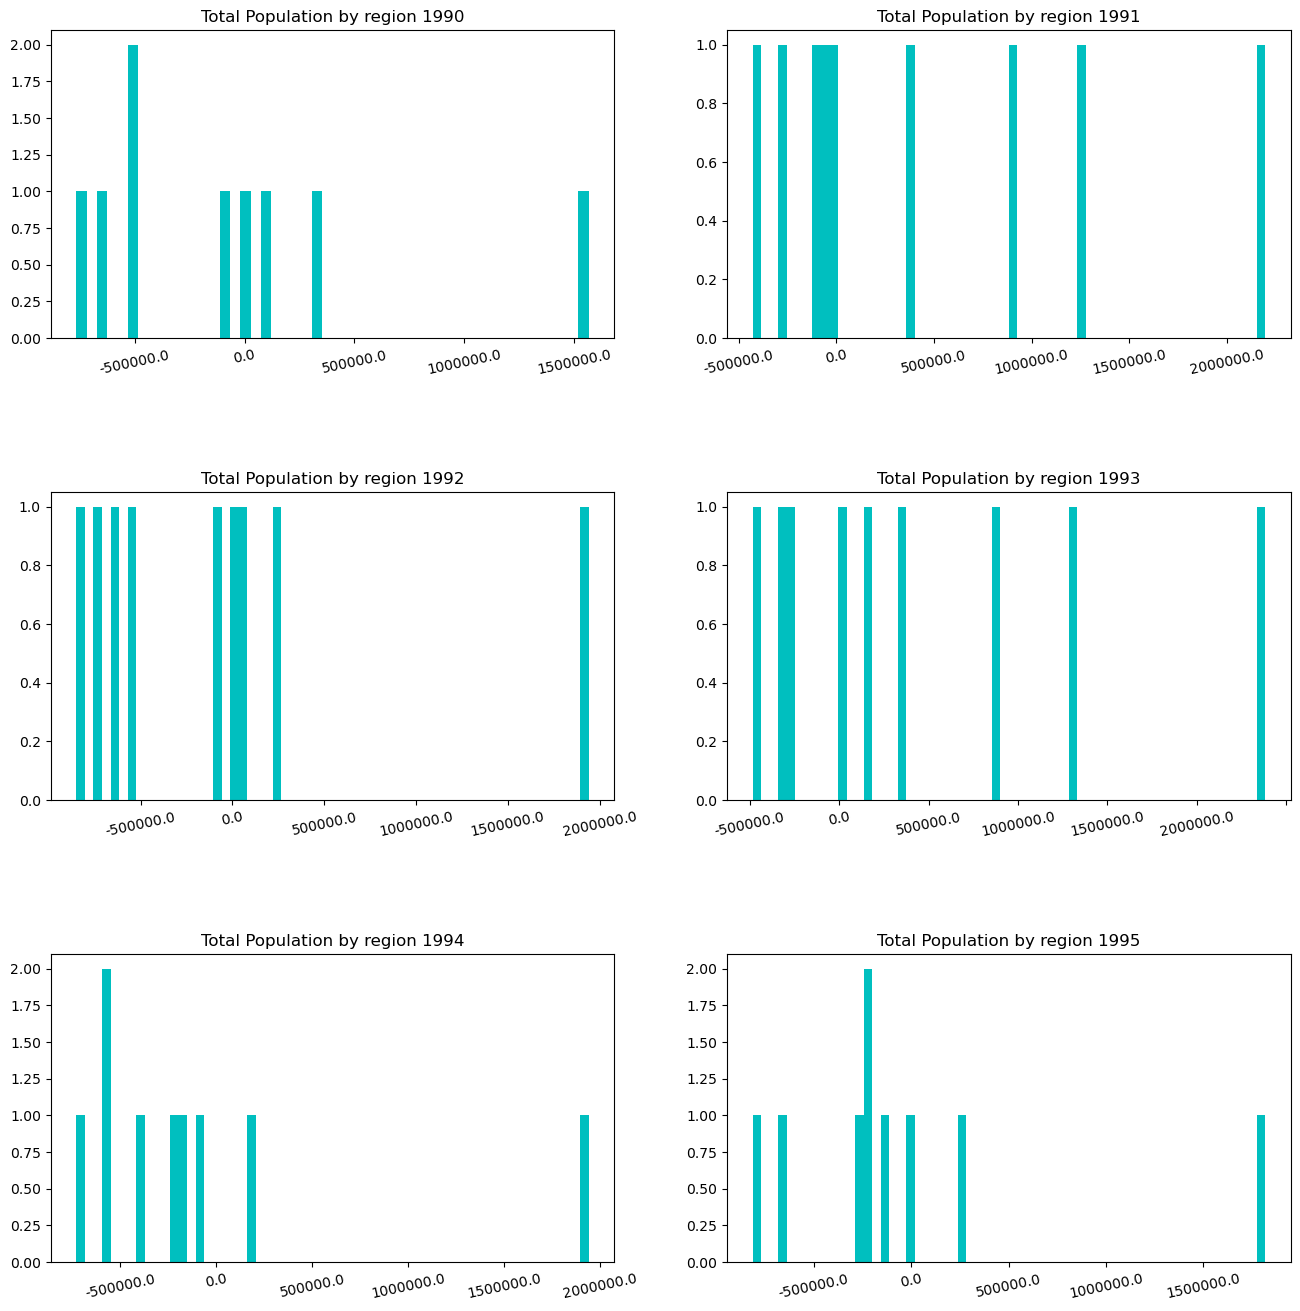

In [11]:
# Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

# First subplot 
ax[0,0].hist(df.population_1990, bins=50, color='c')
ax[0,0].set_title("Total Population by region 1990")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Second subplot 
ax[0,1].hist(df.population_1991, bins=60, color='c')
ax[0,1].set_title("Total Population by region 1991")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Third subplot
ax[1,0].hist(df.population_1992, bins=60, color='c')
ax[1,0].set_title("Total Population by region 1992")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Fourth subplot
ax[1,1].hist(df.population_1993, bins=60, color='c')
ax[1,1].set_title("Total Population by region 1993")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 5
ax[2,0].hist(df.population_1994, bins=60, color='c')
ax[2,0].set_title("Total Population by region 1994")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[2,1].hist(df.population_1995, bins=60, color='c')
ax[2,1].set_title("Total Population by region 1995")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

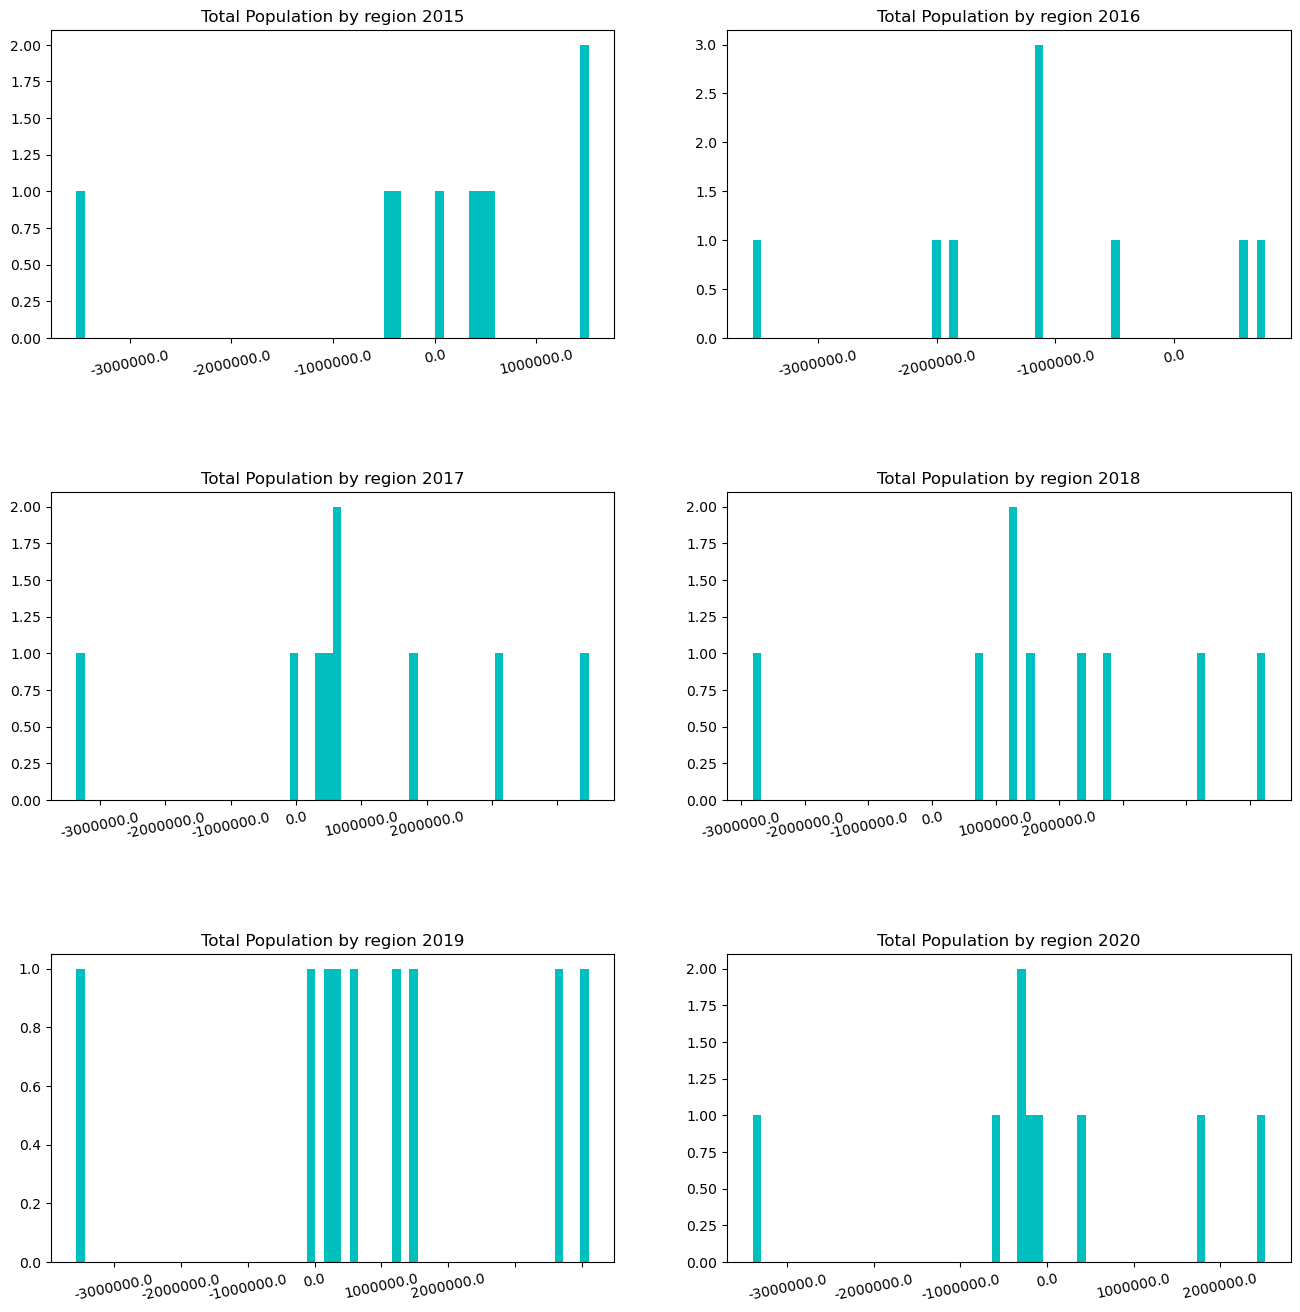

In [12]:
# # Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

ax[0,0].hist(df.population_2015, bins=60, color='c')
ax[0,0].set_title("Total Population by region 2015")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[0,1].hist(df.population_2016, bins=60, color='c')
ax[0,1].set_title("Total Population by region 2016")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[1,0].hist(df.population_2017, bins=60, color='c')
ax[1,0].set_title("Total Population by region 2017")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[1,1].hist(df.population_2018, bins=60, color='c')
ax[1,1].set_title("Total Population by region 2018")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[2,0].hist(df.population_2019, bins=60, color='c')
ax[2,0].set_title("Total Population by region 2019")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[2,1].hist(df.population_2020, bins=60, color='c')
ax[2,1].set_title("Total Population by region 2020")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


# Adjust vertical space between subplots
fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

### Boxplots

Text(0, 0.5, 'total')

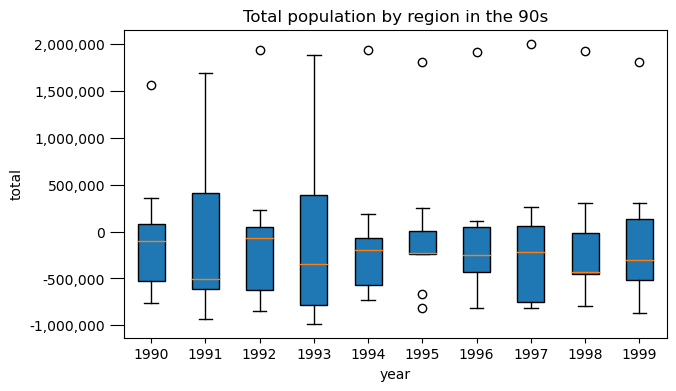

In [13]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_1990, df.population_1991, df.population_1992, df.population_1993,
                 df.population_1994, df.population_1995, df.population_1996, df.population_1997,
                  df.population_1998, df.population_1999], patch_artist=True,
                 labels=['1990','1991', '1992', '1993', '1994','1995','1996', '1997', '1998', '1999'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by region in the 90s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

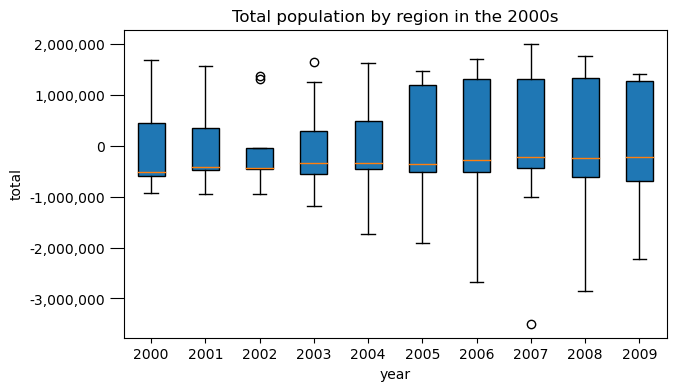

In [14]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_2000, df.population_2001, df.population_2002, df.population_2003,
                 df.population_2004, df.population_2005, df.population_2006, df.population_2007,
                  df.population_2008, df.population_2009], patch_artist=True,
                 labels=['2000','2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by region in the 2000s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

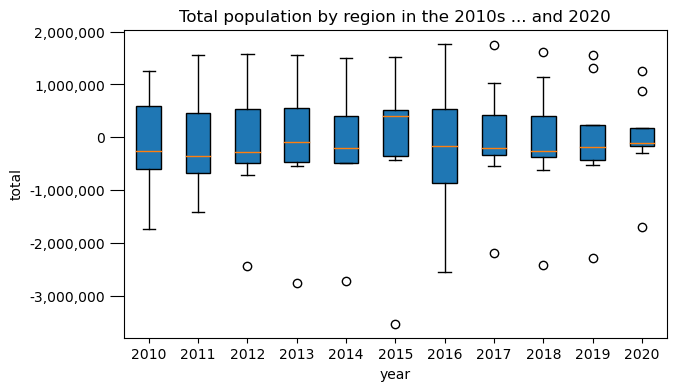

In [15]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_2010, df.population_2011, df.population_2012, df.population_2013,
                 df.population_2014, df.population_2015, df.population_2016, df.population_2017,
                  df.population_2018, df.population_2019,df.population_2020], patch_artist=True,
                 labels=['2010','2011', '2012', '2013', '2014','2015','2016', '2017', '2018', '2019', '2020'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by region in the 2010s ... and 2020")
plt.xlabel("year")
plt.ylabel("total")

## Regions with larger populations

In [16]:
filtered = df.sort_values(by=['population_1990'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_1990.tolist()

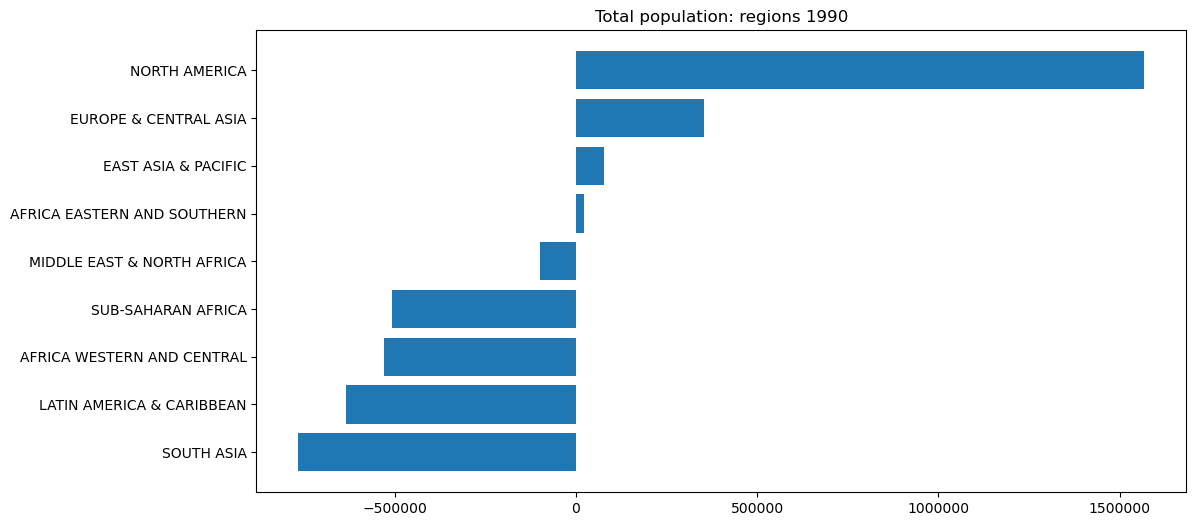

In [17]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 1990")
# plot
plt.show()

In [18]:
filtered = df.sort_values(by=['population_1991'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_1991.tolist()

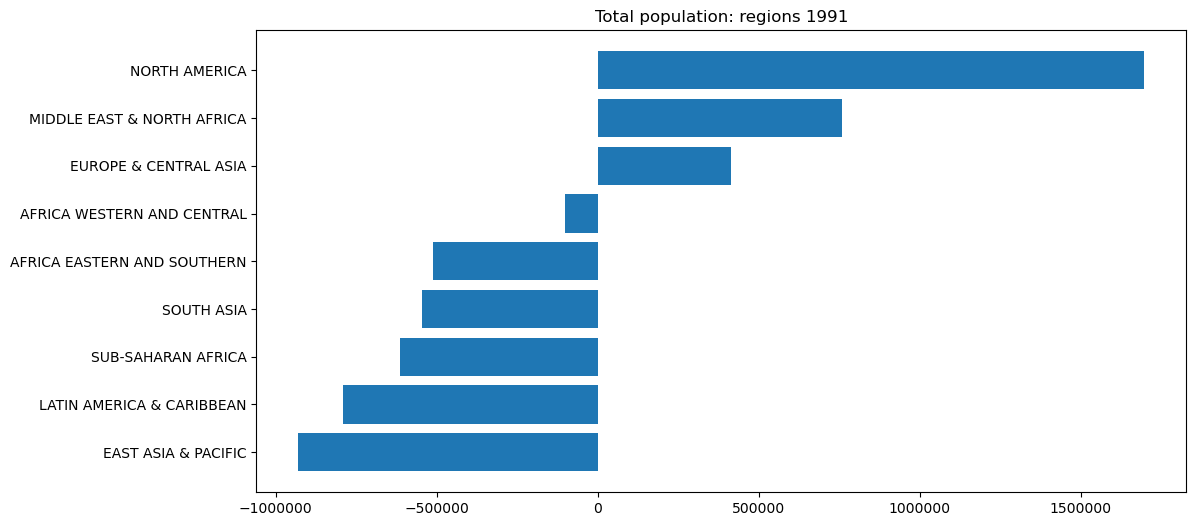

In [19]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 1991")
# plot
plt.show()

In [20]:
filtered = df.sort_values(by=['population_1992'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_1992.tolist()

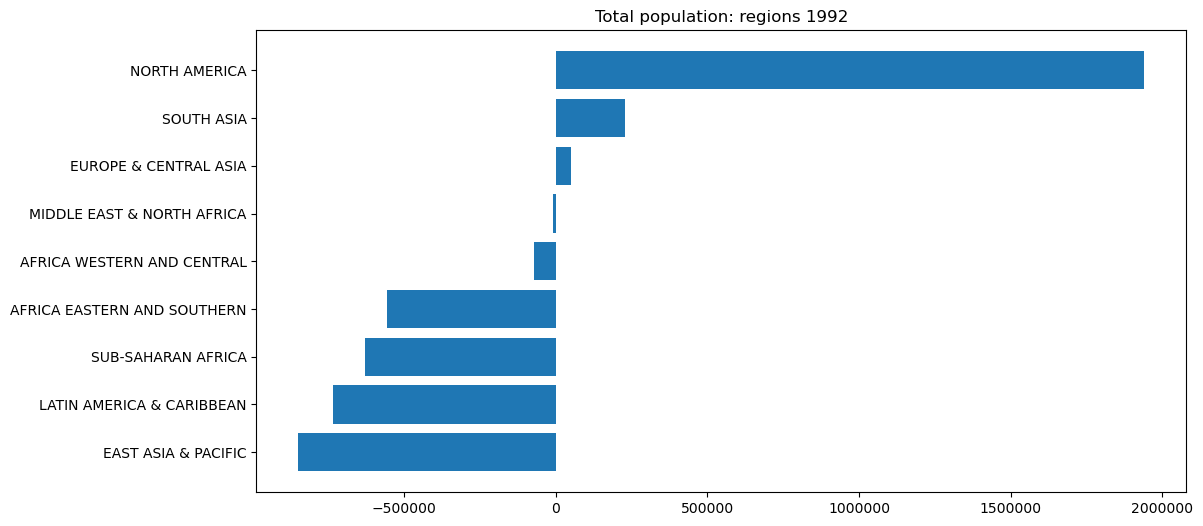

In [21]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 1992")
# plot
plt.show()

### Late 2010s and 2020

In [22]:
filtered = df.sort_values(by=['population_2018'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2018.tolist()

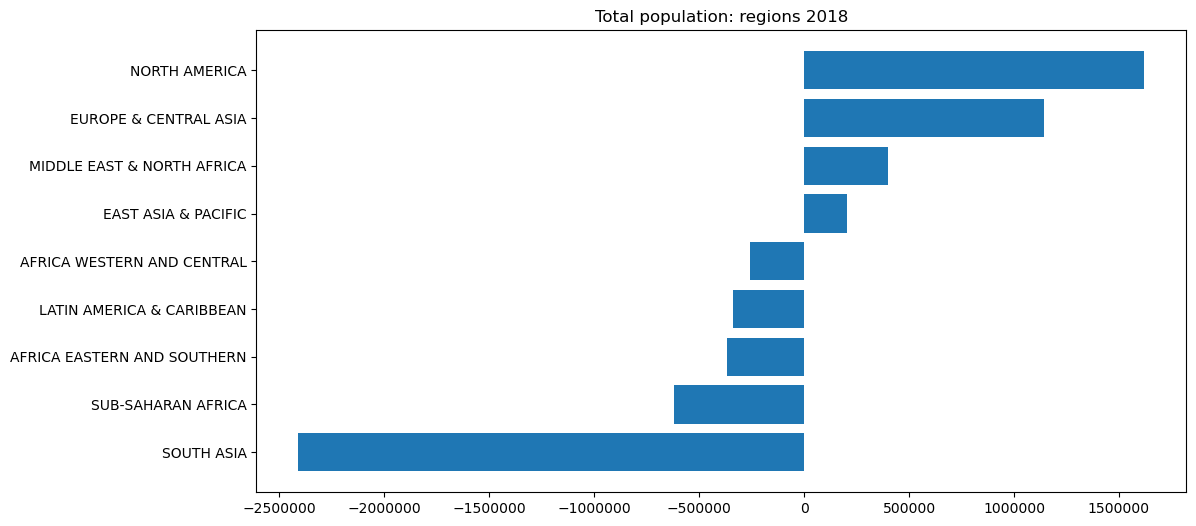

In [23]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 2018")
# plot
plt.show()

In [24]:
filtered = df.sort_values(by=['population_2019'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2019.tolist()

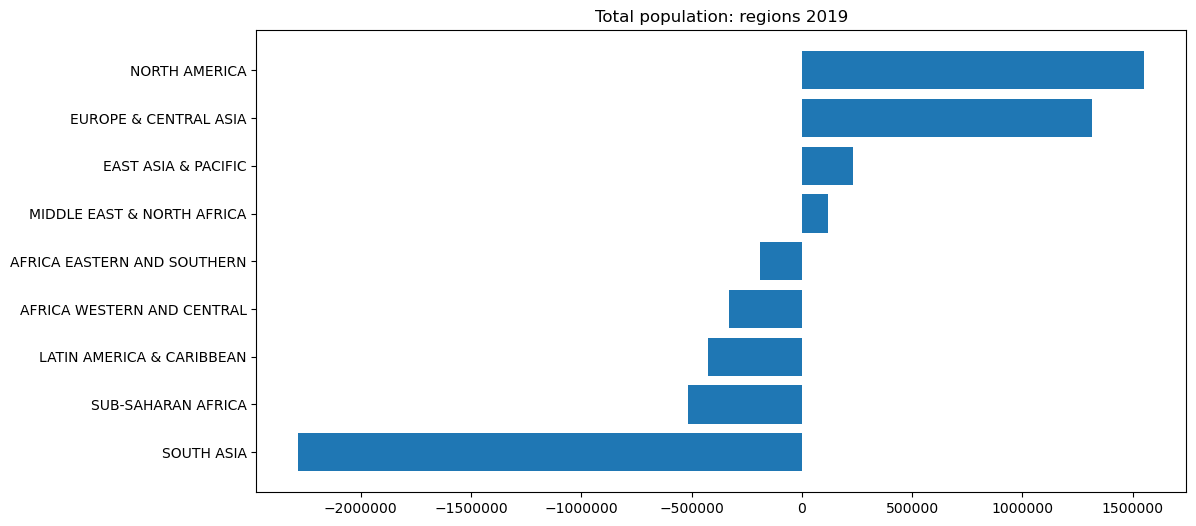

In [25]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 2019")
# plot
plt.show()

In [26]:
filtered = df.sort_values(by=['population_2020'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2020.tolist()

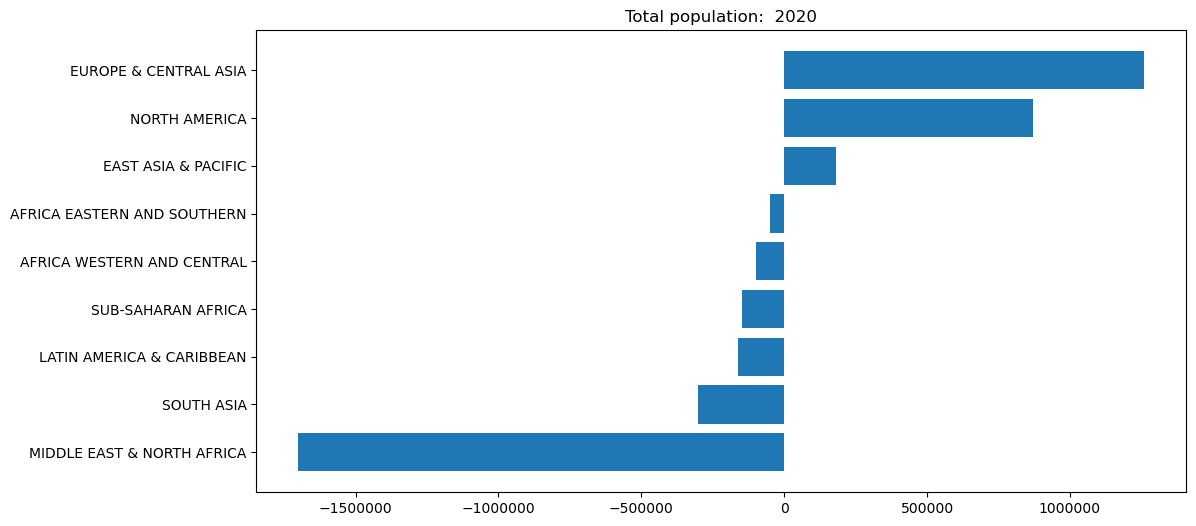

In [27]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("Total population:  2020")

# plot
plt.show()